In [238]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing


In [242]:
dia_df = fetch_california_housing(as_frame=True)

In [244]:
df = pd.DataFrame(data = dia_df.data ,columns = dia_df.feature_names)
df['target'] = dia_df.target


In [246]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [250]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [252]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [266]:
x


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [268]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [274]:
from sklearn.tree import DecisionTreeRegressor

treemodel = DecisionTreeRegressor(max_depth=3)

In [276]:
treemodel.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [278]:
y_pred = treemodel.predict(x_test)

In [280]:
y_pred

array([1.67391798, 1.1972165 , 2.9582535 , ..., 1.94705477, 1.94705477,
       1.67391798])

[Text(0.5, 0.875, 'x[0] <= 5.291\nsquared_error = 1.331\nsamples = 13828\nvalue = 2.067'),
 Text(0.25, 0.625, 'x[0] <= 3.135\nsquared_error = 0.86\nsamples = 11372\nvalue = 1.766'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[2] <= 4.209\nsquared_error = 0.567\nsamples = 5501\nvalue = 1.371'),
 Text(0.0625, 0.125, 'squared_error = 0.708\nsamples = 2009\nvalue = 1.674'),
 Text(0.1875, 0.125, 'squared_error = 0.403\nsamples = 3492\nvalue = 1.197'),
 Text(0.375, 0.375, 'x[5] <= 2.299\nsquared_error = 0.852\nsamples = 5871\nvalue = 2.137'),
 Text(0.3125, 0.125, 'squared_error = 1.348\nsamples = 1101\nvalue = 2.958'),
 Text(0.4375, 0.125, 'squared_error = 0.546\nsamples = 4770\nvalue = 1.947'),
 Text(0.75, 0.625, 'x[0] <= 7.026\nsquared_error = 1.161\nsamples = 2456\nvalue = 3.457'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[5] <= 2.748\nsquared_error = 0.876\nsamples = 1654\nvalue = 3.049'),
 Text(0.5625, 0.125, 'squared_error = 0.96\nsamples = 656\nvalue = 3.545'),
 T

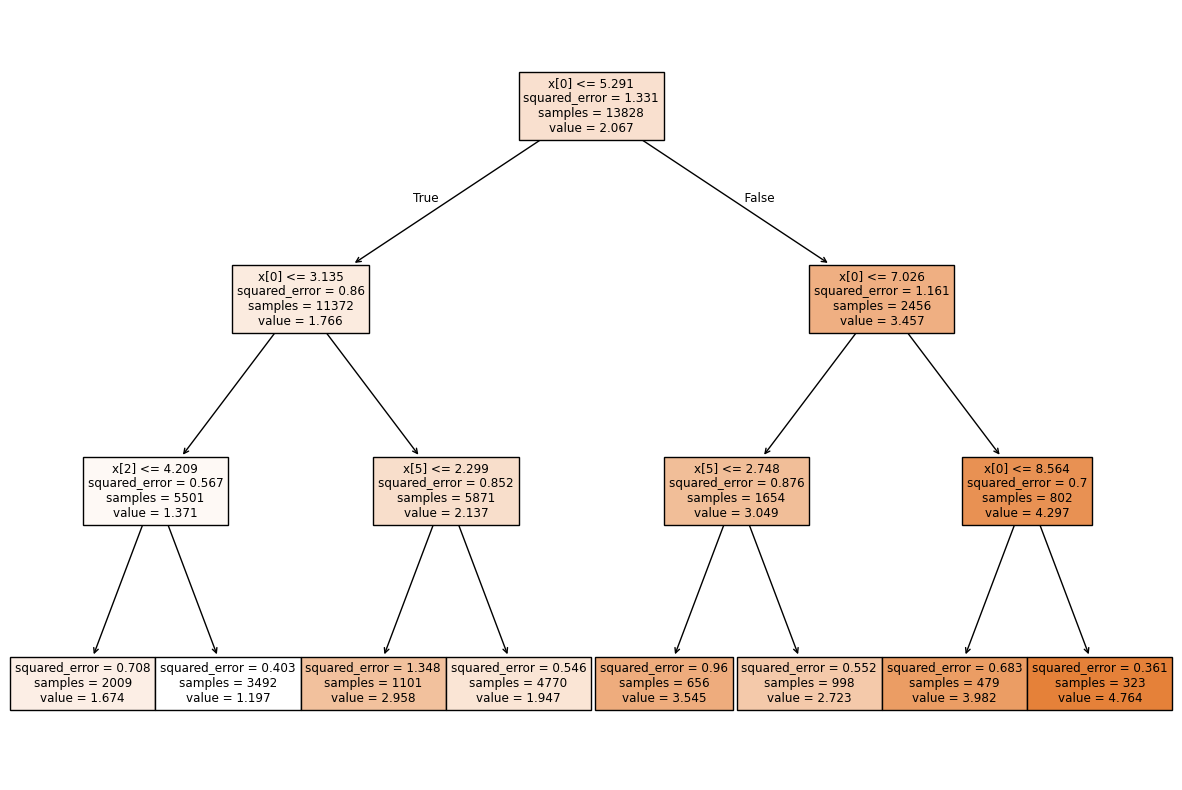

In [282]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel,filled=True)

In [288]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_test,y_pred)

0.6562713060339891

In [290]:
print(r2_score(y_pred,y_test))


0.07897197347488694


In [308]:
param_dist={
    'criterion':['mse','friedman_mse','mae'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,6,7,None],
    'max_features':['auto','sqrt','log2']
}

In [310]:
from sklearn.model_selection import GridSearchCV

In [312]:
treemodel = DecisionTreeRegressor()

cv = GridSearchCV(treemodel,param_dist,cv=5,scoring='neg_mean_squared_error')

In [314]:
cv.fit(x_train,y_train)

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
560 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [316]:
cv.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 7,
 'max_features': 'log2',
 'splitter': 'best'}

In [318]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15316    1.66100
14772    0.93600
12870    1.07000
13476    1.30700
16123    3.07100
Name: target, Length: 6812, dtype: float64

In [320]:
y_pred

array([1.67391798, 1.1972165 , 2.9582535 , ..., 1.94705477, 1.94705477,
       1.67391798])

In [322]:
y_pred = cv.predict(x_test)

In [328]:
score=mean_squared_error(y_pred,y_test)


In [330]:
score

0.49840335600434676

In [351]:
from sklearn.datasets import load_diabetes

dia_df = load_diabetes(as_frame=True)

In [355]:
df = pd.DataFrame(dia_df.data,columns = dia_df.feature_names)

In [357]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [393]:
X = df.iloc[:,1:]
Y = dia_df.target

In [395]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33,random_state=42)

In [397]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3)

In [399]:
tree.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

In [401]:
Y_pred = tree.predict(X_test)

In [403]:
Y_pred

array([131.,  85., 131., 248.,  85.,  85., 275., 131., 131.,  85.,  85.,
       131.,  85., 131.,  85.,  85., 220., 275., 178., 131., 131.,  85.,
        85., 131.,  85., 178., 178., 124.,  85.,  85.,  85.,  85., 131.,
       131.,  85., 275.,  85.,  85., 131.,  85.,  85.,  85., 124.,  84.,
       131.,  85.,  85.,  85.,  85., 131.,  85.,  85., 124.,  85., 248.,
        85.,  85., 131.,  85.,  85., 131., 131.,  85.,  85., 178., 131.,
       131., 131.,  85., 131., 131., 131., 131., 178.,  85.,  84., 131.,
       131.,  85., 248.,  85.,  85.,  85.,  85.,  85.,  85.,  85.,  85.,
        85., 131., 124.,  85.,  85.,  85.,  85.,  85., 220., 178.,  85.,
        85., 131., 124., 275.,  85.,  85.,  85.,  85.,  85., 131.,  85.,
       178., 131., 131., 131., 131., 131.,  85.,  85.,  85., 131.,  85.,
        85.,  85.,  85.,  85., 131., 178., 178., 124.,  85.,  85.,  85.,
       131., 131.,  85., 131., 275., 178.,  85.,  85.,  85., 131., 248.,
        85., 248., 248.])

In [417]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.0

In [419]:
param_={
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,6,7,None],
    'max_features':['auto','sqrt','log2']
}

In [423]:
from sklearn.model_selection import GridSearchCV

tree1 = DecisionTreeClassifier()
CV = GridSearchCV(tree1,param_,scoring='accuracy')

In [425]:
CV.fit(X_train,Y_train)

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
240 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, i

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [445]:
Y_pred = CV.predict(X_test)

In [437]:
CV.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [441]:
Y_test.values

array([219.,  70., 202., 230., 111.,  84., 242., 272.,  94.,  96.,  94.,
       252.,  99., 297., 135.,  67., 295., 264., 170., 275., 310.,  64.,
       128., 232., 129., 118., 263.,  77.,  48., 107., 140., 113.,  90.,
       164., 180., 233.,  42.,  84., 172.,  63.,  48., 108., 156., 168.,
        90.,  52., 200.,  87.,  90., 258., 136., 158.,  69.,  72., 171.,
        95.,  72., 151., 168.,  60., 122.,  52., 187., 102., 214., 248.,
       181., 110., 140., 202., 101., 222., 281.,  61.,  89.,  91., 186.,
       220., 237., 233.,  68., 190.,  96.,  72., 153.,  98.,  37.,  63.,
       184., 144., 150., 280., 125.,  59.,  65., 281., 277., 167.,  90.,
        72., 178.,  88., 270., 101., 197.,  97.,  53.,  71., 262.,  52.,
       102., 166., 189., 173., 220., 206.,  97.,  60.,  61., 242., 121.,
       128., 104., 265., 132., 283., 174., 129., 257., 137.,  63.,  93.,
       232., 208., 261., 179., 258., 262.,  51., 237.,  71., 139., 268.,
        69., 317., 249.])

In [451]:
Y_pred

array([142.,  66., 142., 163., 142., 142.,  66., 235., 142., 142., 142.,
       142., 142., 310., 142., 142., 142., 163., 281., 163., 142., 142.,
       142., 163., 142.,  66., 163., 163., 142., 142., 128., 142.,  55.,
        66., 142., 163., 142., 142., 142., 142., 142., 163.,  66., 142.,
        66., 142.,  55., 142., 142., 142., 142.,  55., 142., 142., 163.,
       142., 142.,  66., 142.,  55., 142., 142., 142., 163., 142., 163.,
       163., 163.,  55., 142., 142., 163., 310., 142., 142., 235., 163.,
       142.,  66., 142., 142., 142.,  55., 142., 142., 142., 142.,  78.,
       142., 163., 142., 163., 142.,  55.,  55.,  66., 163., 142., 142.,
        55., 163., 142., 163., 142., 142., 142.,  66., 163., 142., 163.,
       104., 163., 163., 142., 142., 142., 142.,  66., 142., 142., 142.,
        78., 142.,  66.,  66., 281., 142., 142., 163., 142., 163., 142.,
        66., 163., 163.,  66., 163., 142.,  55.,  66., 142., 235., 142.,
       142., 142., 142.])

In [453]:
accuracy_score = (Y_test,Y_pred)

In [455]:
accuracy_score

(287    219.0
 211     70.0
 72     202.0
 321    230.0
 73     111.0
        ...  
 346    139.0
 168    268.0
 393     69.0
 141    317.0
 324    249.0
 Name: target, Length: 146, dtype: float64,
 array([142.,  66., 142., 163., 142., 142.,  66., 235., 142., 142., 142.,
        142., 142., 310., 142., 142., 142., 163., 281., 163., 142., 142.,
        142., 163., 142.,  66., 163., 163., 142., 142., 128., 142.,  55.,
         66., 142., 163., 142., 142., 142., 142., 142., 163.,  66., 142.,
         66., 142.,  55., 142., 142., 142., 142.,  55., 142., 142., 163.,
        142., 142.,  66., 142.,  55., 142., 142., 142., 163., 142., 163.,
        163., 163.,  55., 142., 142., 163., 310., 142., 142., 235., 163.,
        142.,  66., 142., 142., 142.,  55., 142., 142., 142., 142.,  78.,
        142., 163., 142., 163., 142.,  55.,  55.,  66., 163., 142., 142.,
         55., 163., 142., 163., 142., 142., 142.,  66., 163., 142., 163.,
        104., 163., 163., 142., 142., 142., 142.,  66., 142., 